# MNIST dataset 
MNIST is a dataset for hand-written digit recognition. Each image in MNIST has 28x28 pixels which can be represented in an array with 784 elements. 

Will try to compress images using PCA and re-generate them

In [ ]:
# Importing data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


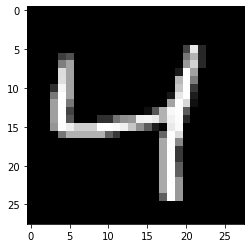

In [ ]:
# Sample entry
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

In [ ]:
#Obtaining Covariance of Dataframe and eigendecomposition
cov = np.cov(x.T)
eigenValues, eigenVectors = np.linalg.eigh(cov)
arg = np.argsort(-eigenValues)
eigenValues = eigenValues[arg]
eigenVectors = eigenVectors[:, arg]


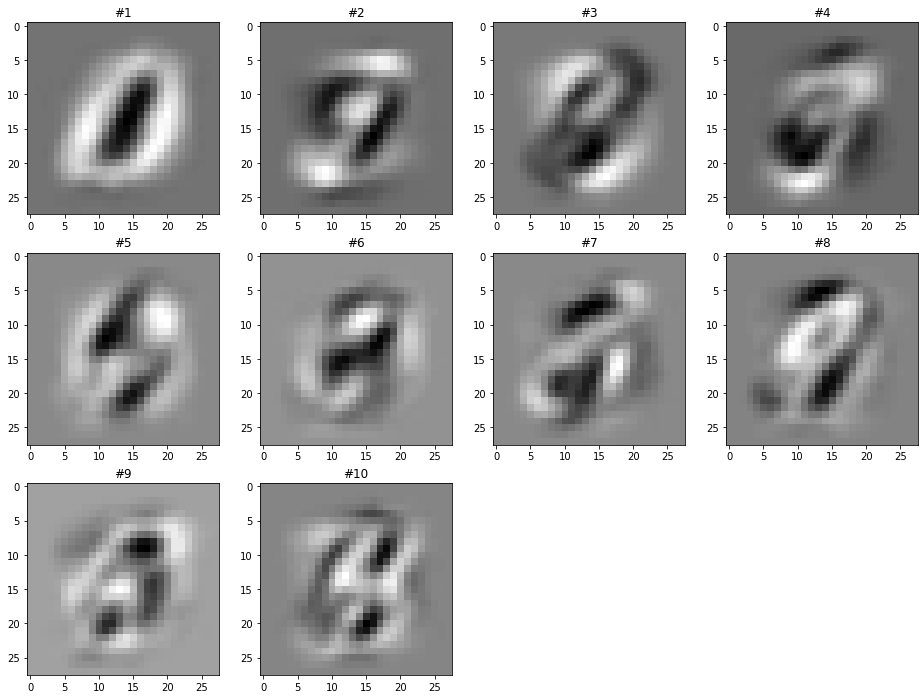

In [ ]:
#Plotting first 10 eigenvectors

fig = plt.figure(figsize=(16, 12))

for i in range(0, 10):
    plt.subplot(3, 4, i+1)
    plt.imshow(eigenVectors[:, i].reshape(-1, 28))
    plt.title('#{}'.format(i+1))

In [ ]:
#Function that plots a random image from the dataset 

def imageReconstruct (numComponent,rand=True,number=0):
  '''
  numComponent = The number of components used to reconstruct the image
  rand = True if you want a random image, False if you want to select an image
  number = image number, default = 0
  '''
  
  from random import randint
  import math
  images = []
  # used to implement randomization
  if rand == True:
    num = randint(0,x.shape[0]-1)
  else:
    num = number
  
  # Generates the reconstructed image
  mean = x.mean(axis=0)
  # print('mean shape' ,mean.shape)

  # loops through the number of components and generates a sequence of reconstructed images
  # for i in range (1,numComponent +1):
  #   projectionMatrix = np.dot(x[num].reshape(1,-1) - mean,eigenVectors[:, 0:i])
  #   reconstructedImage = np.dot(projectionMatrix, eigenVectors[:, 0:i].T) + mean
  #   images.append(reconstructedImage.reshape(28,-1))

  projectionMatrix = np.dot(x[num].reshape(1,-1) - mean,eigenVectors[:, 0:numComponent+1])
  # print('projection matrix shape', projectionMatrix.shape)
  reconstructedImage = np.dot(projectionMatrix, eigenVectors[:, 0:numComponent+1].T) + mean
  # print('eigenvector shape', eigenVectors[:, 0:numComponent+1].shape)
  
  # Plots

  # Identifies the image number used
  print('The image number is', num)

  # Plots the original image
  plt.imshow(x[num].reshape(28,-1))
  plt.title('Orignal Image')  
  plt.show()

  # Plots the reconstructed image
  plt.imshow(reconstructedImage.reshape(28,-1))
  plt.title('Reconstructed image using ' + str(numComponent) + ' Components')
  plt.show()

  # Plots the sequentially reconstructed images
  # row = math.ceil(numComponent/4)
  # fig = plt.figure(figsize=(16, row * 4))
  # for i in range(0, numComponent):
  #   plt.subplot(row, 4, i+1)
  #   plt.imshow(images[i])
  #   plt.title('#{}'.format(i+1))


The image number is 10


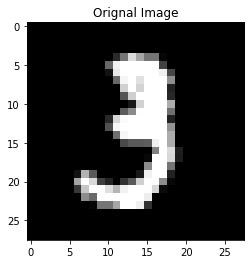

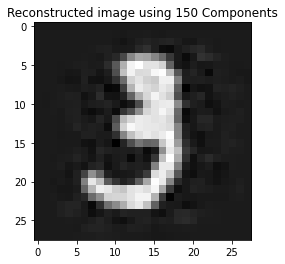

The image number is 103


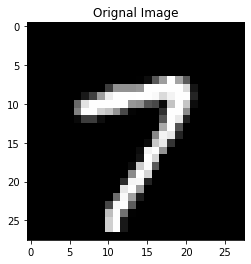

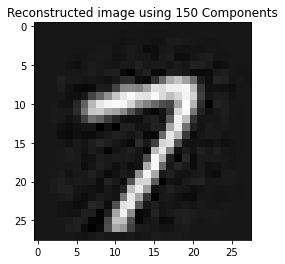

In [ ]:
imageReconstruct(150, rand=False, number=10)
imageReconstruct(150)

The image number is 10


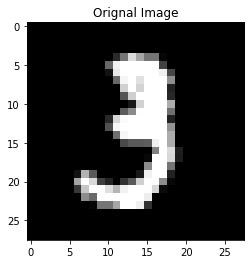

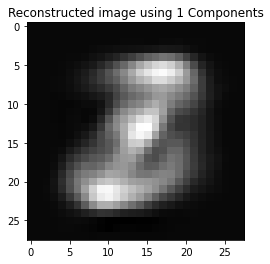

The image number is 10


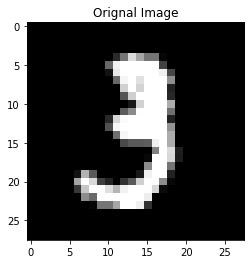

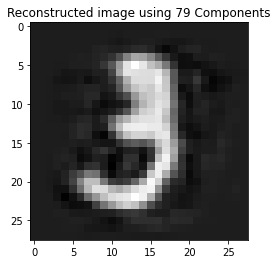

The image number is 10


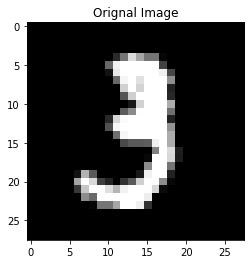

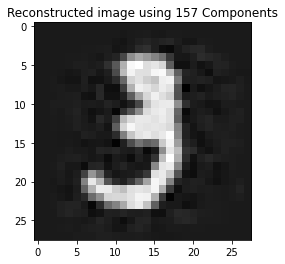

The image number is 10


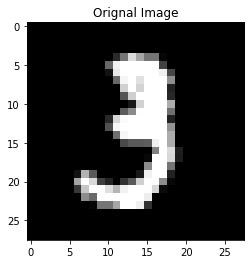

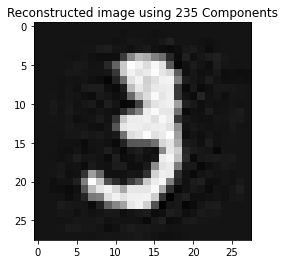

The image number is 10


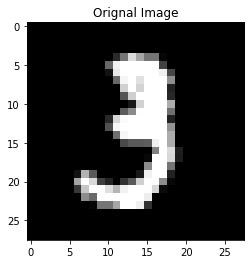

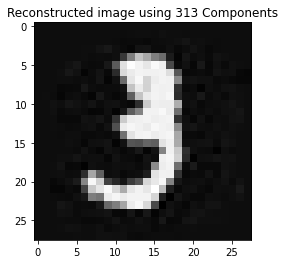

The image number is 10


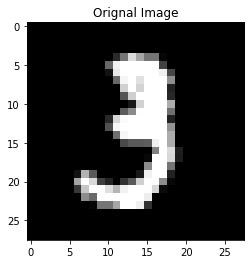

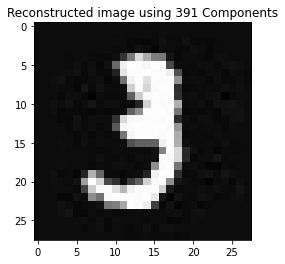

The image number is 10


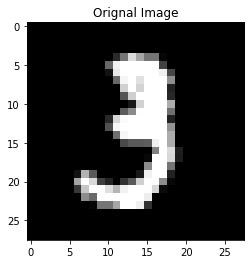

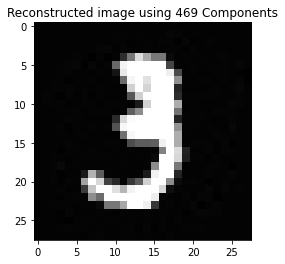

The image number is 10


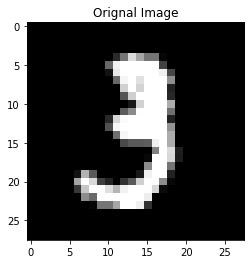

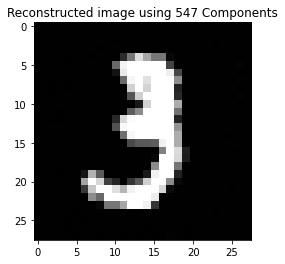

The image number is 10


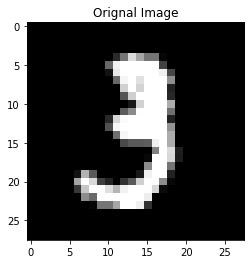

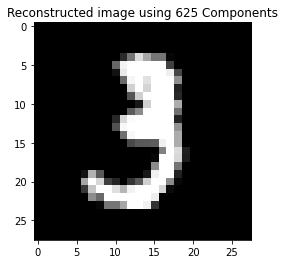

The image number is 10


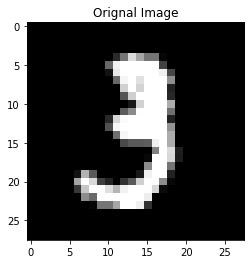

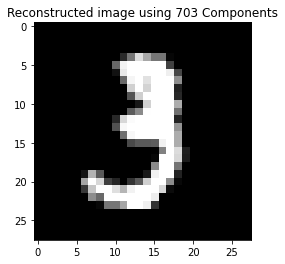

The image number is 10


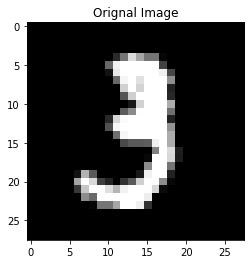

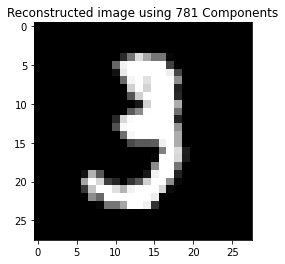

In [ ]:
# running function 10 times to assess quality of reconstructed image
for i in range(1,785,78):
  imageReconstruct(i, rand=False, number=10)

The image number is 0


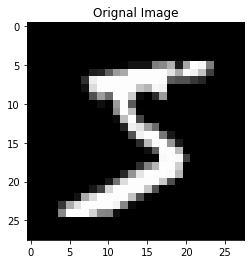

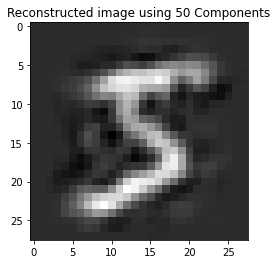

The image number is 0


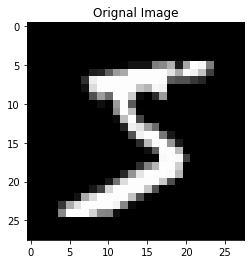

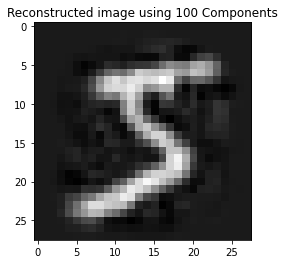

The image number is 0


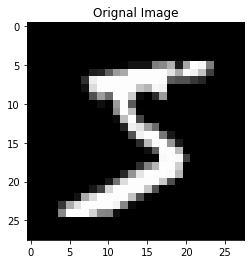

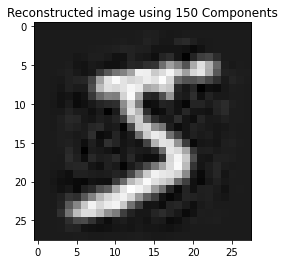

The image number is 0


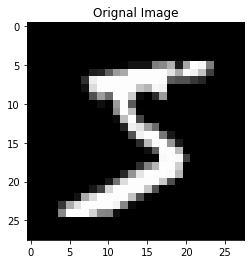

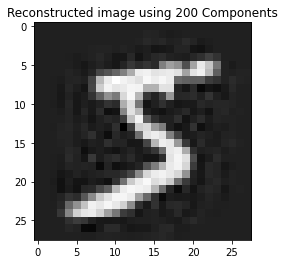

The image number is 0


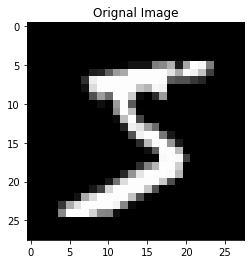

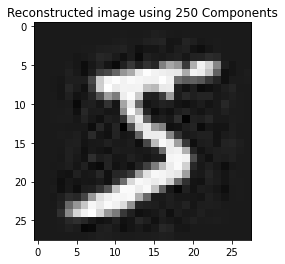

In [ ]:
# Trying a narrower range

for i in range(50,252,50):
  imageReconstruct(i, rand=False)

The image number is 15


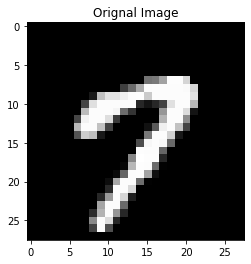

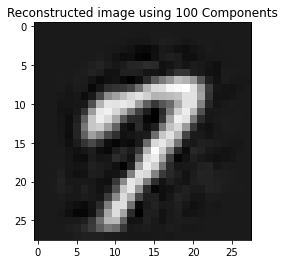

The image number is 15


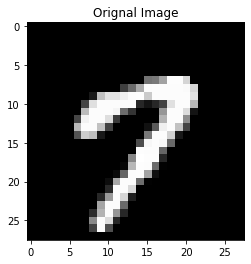

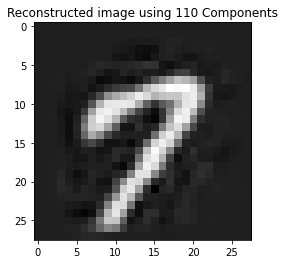

The image number is 15


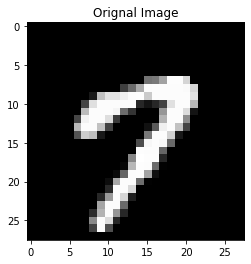

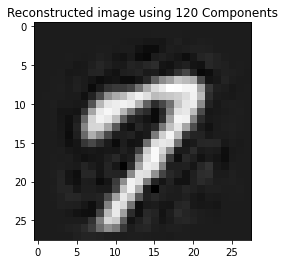

The image number is 15


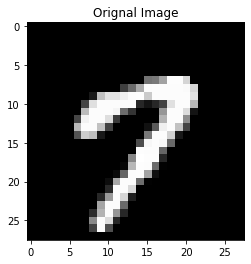

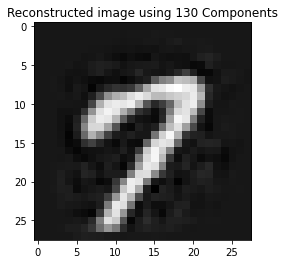

The image number is 15


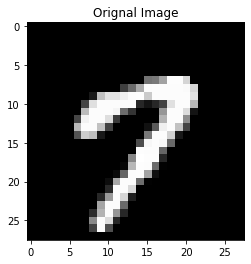

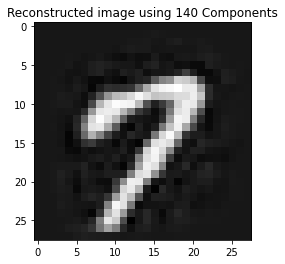

The image number is 15


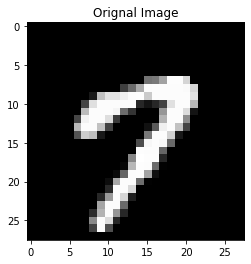

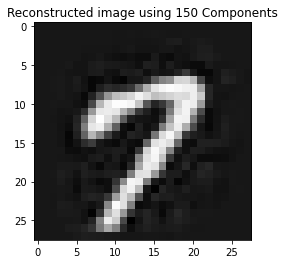

The image number is 15


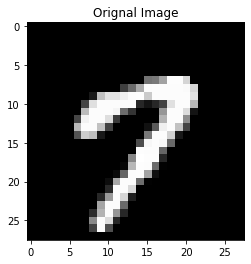

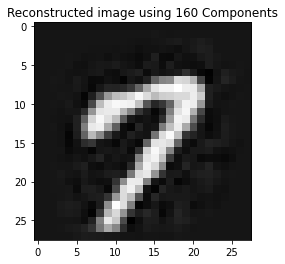

The image number is 15


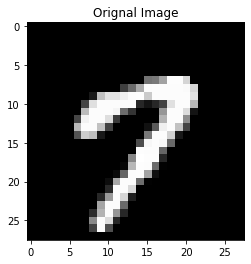

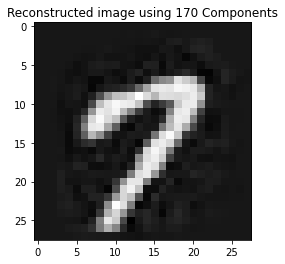

The image number is 15


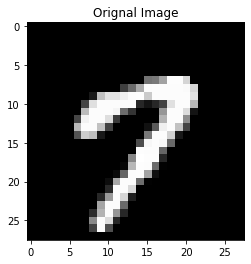

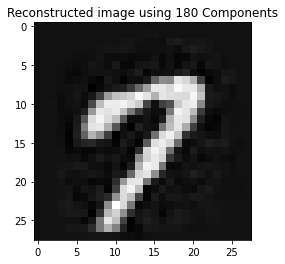

The image number is 15


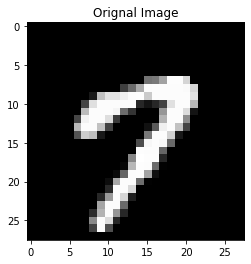

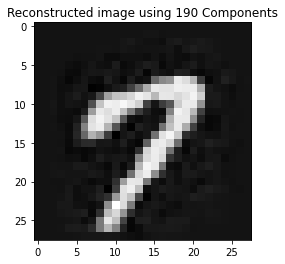

The image number is 15


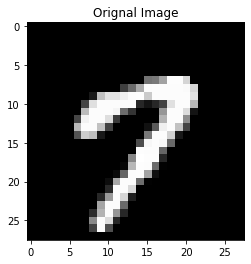

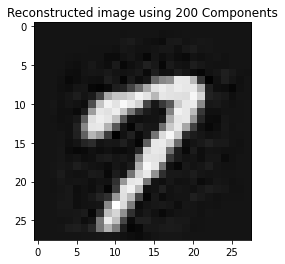

The image number is 15


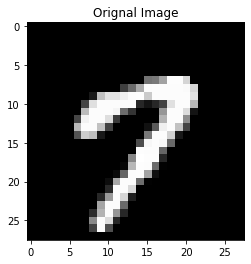

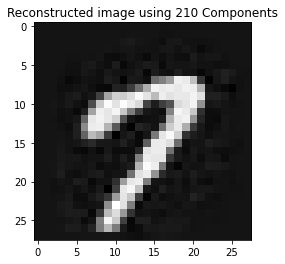

The image number is 15


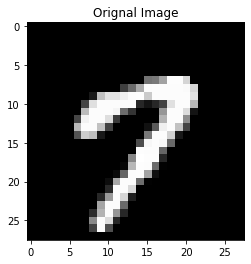

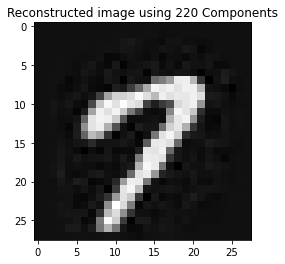

The image number is 15


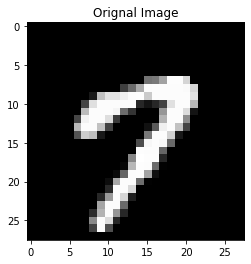

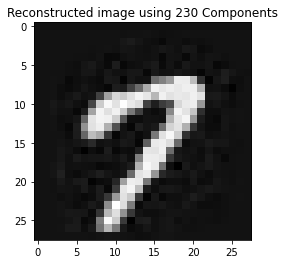

The image number is 15


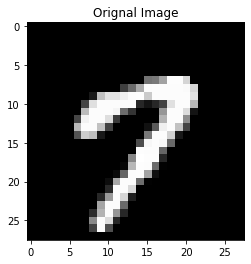

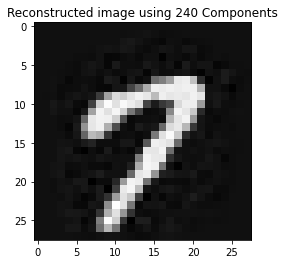

The image number is 15


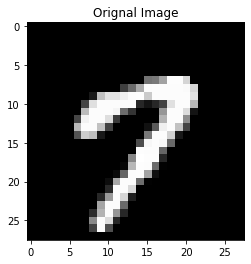

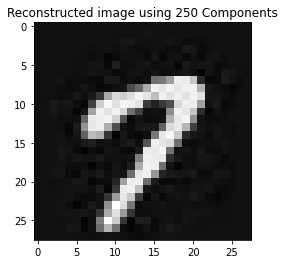

In [ ]:
# Trying an even narrower range

for i in range(100,251,10):
  imageReconstruct(i, rand=False, number = 15)

The image number is 100


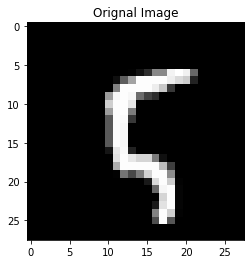

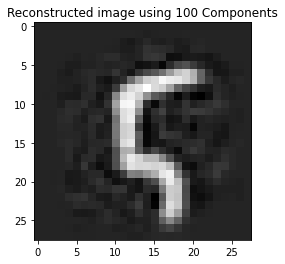

The image number is 100


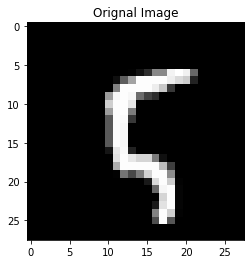

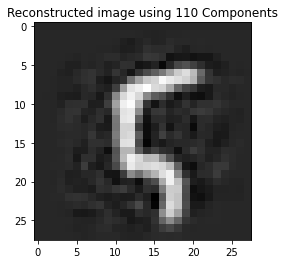

The image number is 100


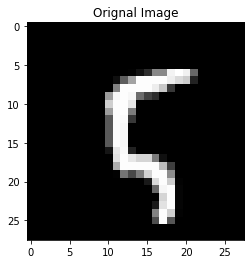

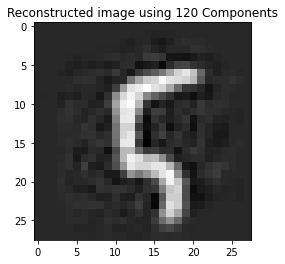

The image number is 100


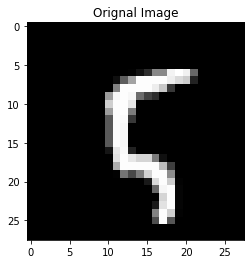

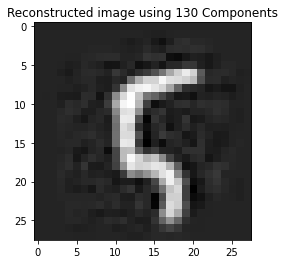

The image number is 100


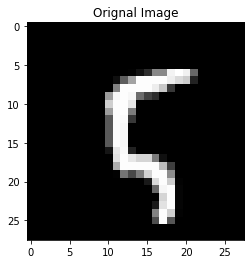

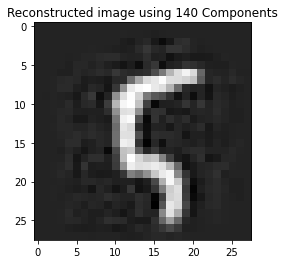

The image number is 100


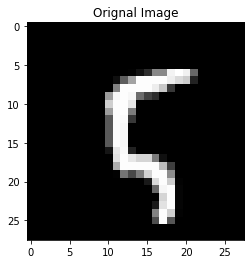

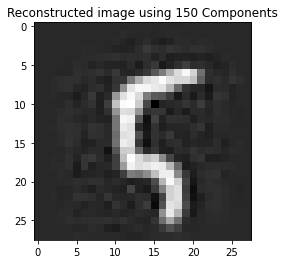

The image number is 100


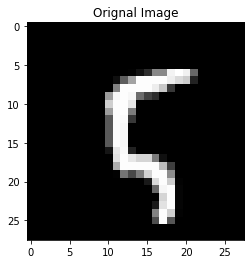

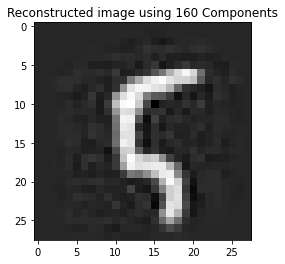

The image number is 100


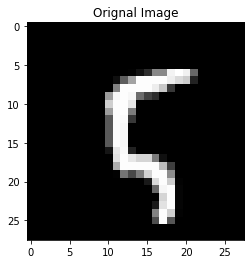

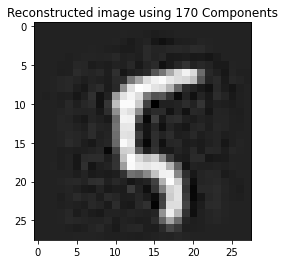

The image number is 100


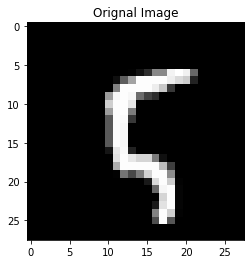

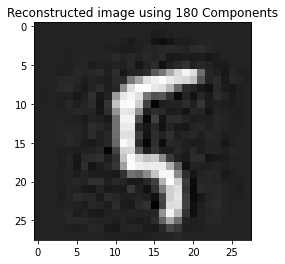

The image number is 100


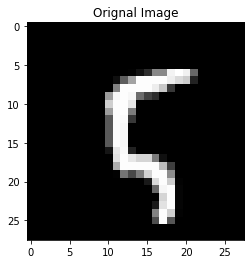

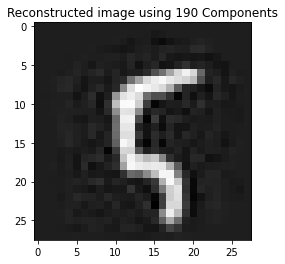

The image number is 100


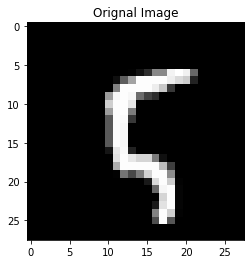

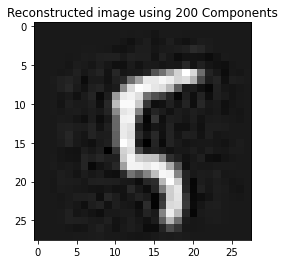

The image number is 100


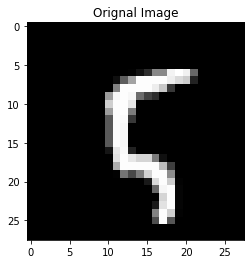

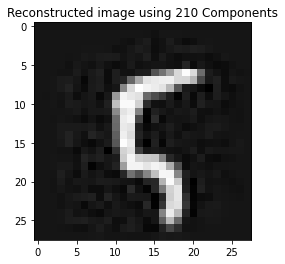

The image number is 100


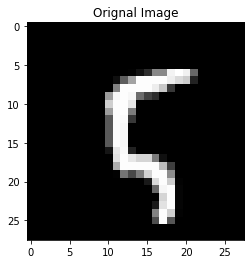

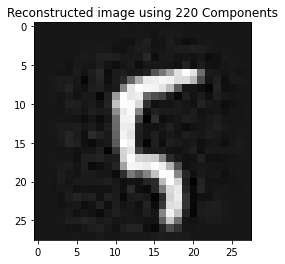

The image number is 100


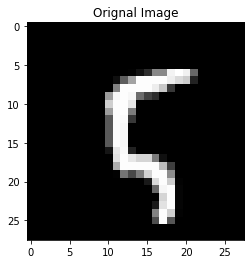

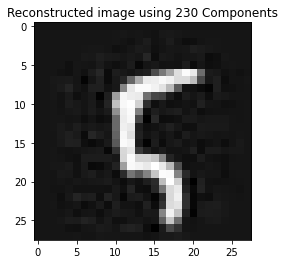

The image number is 100


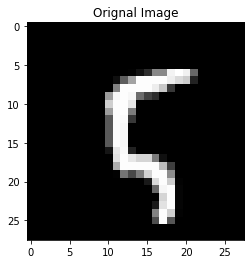

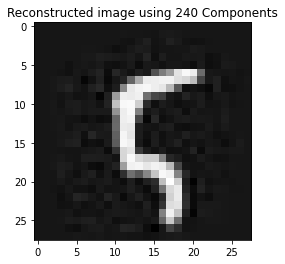

The image number is 100


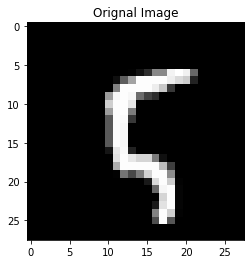

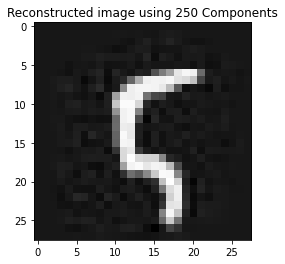

In [ ]:
# Repeating on a different number

for i in range(100,251,10):
  imageReconstruct(i, rand=False, number = 100)

In [ ]:
#150-200 components seems to be sufficient to distinguish the numbers

def compressionRatio(samples, features, principalComponents):
  totalElements = samples*features
  compressedElements = (samples*principalComponents) + (principalComponents*features) + features
  compressionRatio = totalElements/compressedElements
  print('The compression ratio for', samples,'samples containing',features,'features using', \
        principalComponents, 'principal components is', '%.2f' %compressionRatio + str('x'))